<h1 align="center"><font size="5">Projet Machine Learning : Prédiction de l'attrition client </font></h1>

Travail rédigé par:  Aloui Ameni, Roua Riahi, Malek Kobbi, Hazem, Farhat, Jawher Aloui

# Objectif du projet
L'objectif de ce projet est de:

1.Comprendre les données en faisant des graphiques, utilisant pandas,...

2.Faire la Préparation des données nettoyage, encodage, normalisation et etc

3.Faire l'étape de feautres selection.

4.Tester les algorithmes demandés selon le fichier de la répartition des projets et des modèles pour la résolution du problème.

5.Régler le maximum de paramètres pour chaque algorithme

6.Tracer la matrice de confusion et afficher classification_report de chaque algorithme.

7.Calculer l'Auc pour les algorithmes.

8.Choisir le meilleur algorithme en utilisant classification_report


# Base de données __Telco_Customer_Churn__

Pour ce projet on considère un jeu de données en télécommunications. 

Chaque exemple correspond à un client abonné ou non à un service de télécommunications. 

Les variables explicatives portent sur des caractéristiques observées de client. 

La variable  __churn__ à prédire indique si le client est abonné ou non.

# Data understanding

In [1]:
! python -m pip install --upgrade pip
! python -m pip install scikit-learn-intelex

In [2]:
# Chargement des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Importation de l'ensemble de données:

In [3]:
df = pd.read_csv("Telco_Customer_Churn.CSV")


In [4]:
data=df 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.shape

(7043, 21)

#### Afichage des trois premières et derniers lignes de `data`

In [7]:
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [8]:
data.tail(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


#### Statistiques nécessaires pour `data` 

In [9]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### Suppression de la colonne `customerID` puisqu' on n' a pas besoin dans le reste de l'analyse

In [10]:
data = data.drop('customerID', axis=1)

In [11]:
data.shape

(7043, 20)

#### Transformation de la variable predictive `churn` en valeur numérique

In [12]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Churn']= label_encoder.fit_transform(data['Churn'])
  
data['Churn'].unique()

array([0, 1])

"Churn" fait référence au phénomène de résiliation de l'abonnement par les clients. 
Lorsqu'un client décide de mettre fin à son contrat ou de ne plus utiliser les services de l'opérateur de télécommunications
but :prédiction pour comprendre les facteurs qui peuvent conduire à la résiliation d'un abonnement

In [13]:
data.Churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

#### Transformation des caractéristique de type object comme des valeurs numériques

In [14]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int32
dtype: object

In [15]:
for col in data.columns:
    print(col,data[col].unique())

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges ['29.85' '1889

In [16]:
# OrdinalEncoder is for converting features, while LabelEncoder is for converting target variable.
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
data[['gender','Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']] = enc.fit_transform(data[['gender','Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']])



In [17]:
data.dtypes

gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges         object
Churn                 int32
dtype: object

In [18]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')#Replace empty strings with NaN
data['TotalCharges'] = data['TotalCharges'].astype(float)# Convert column to float

In [19]:
total_missing = data.isnull().sum()
total_missing

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [20]:
data = data.dropna()

#### le nombre de valeurs uniques qui se produisent dans notre base de données ou dans une colonne:

In [21]:
data.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

#### Corrélation de "Churn" avec les autres variables:

In [22]:
data1=data.drop('Churn',axis=1)
data1.corrwith(data["Churn"])

gender             -0.008545
SeniorCitizen       0.150541
Partner            -0.149982
Dependents         -0.163128
tenure             -0.354049
PhoneService        0.011691
MultipleLines       0.038043
InternetService    -0.047097
OnlineSecurity     -0.289050
OnlineBackup       -0.195290
DeviceProtection   -0.177883
TechSupport        -0.282232
StreamingTV        -0.036303
StreamingMovies    -0.038802
Contract           -0.396150
PaperlessBilling    0.191454
PaymentMethod       0.107852
MonthlyCharges      0.192858
TotalCharges       -0.199484
dtype: float64

Pour SeniorCitizen: on peut dire que les clients plus âgés sont légèrement plus susceptibles de résilier leur abonnement.
partenaire: Les clients ayant un partenaire ont tendance à être légèrement moins susceptibles de résilier leur abonnement.
Dependents:Les clients ayant des personnes à charge ont tendance à être légèrement moins susceptibles de résilier leur abonnement.
tenure:(forte)Plus la durée d'abonnement est longue, moins il y a de chances que le client résilie son abonnement.
Contract:(Forte)  Les clients ayant des contrats à durée plus longue (One year, Two year) ont tendance à être beaucoup moins
susceptibles de résilier leur abonnement par rapport à ceux ayant un contrat mensuel (Month-to-month).

#### Comparaison des distributions avec un boxplot par rapport au variable cible 'churn'

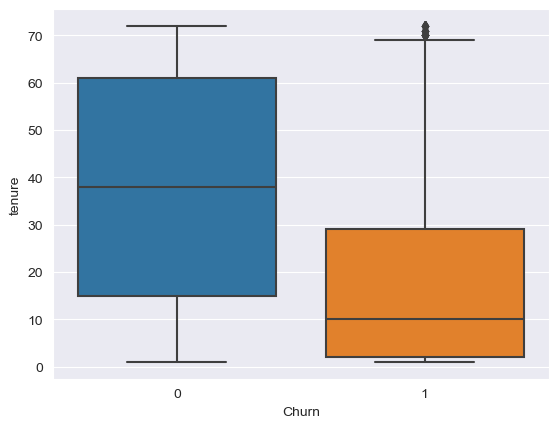

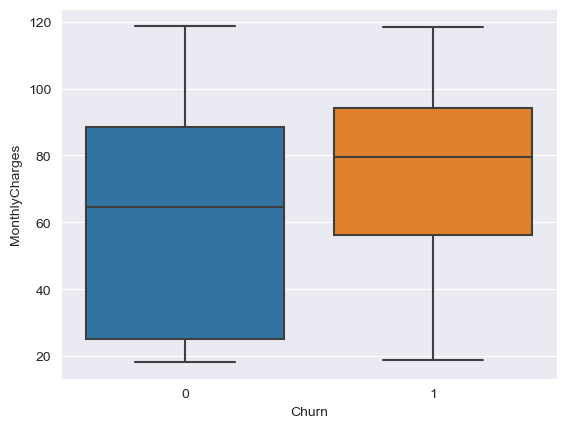

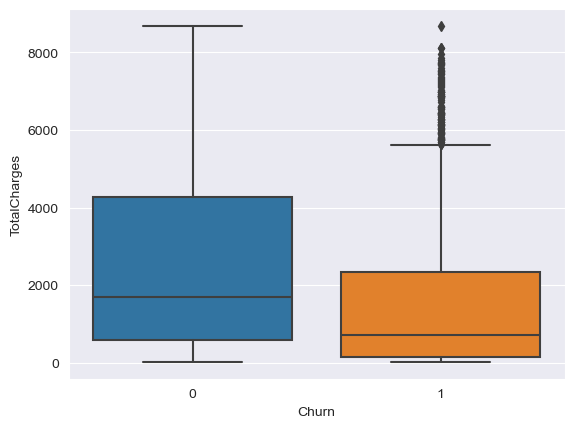

In [23]:
import seaborn as sns
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numeric_cols:
    sns.boxplot(x='Churn', y=col, data=data)
    plt.show()


#### Visualisation des relations entre ces caractéristiques :

C:\Users\aloui\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aloui\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\aloui\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aloui\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

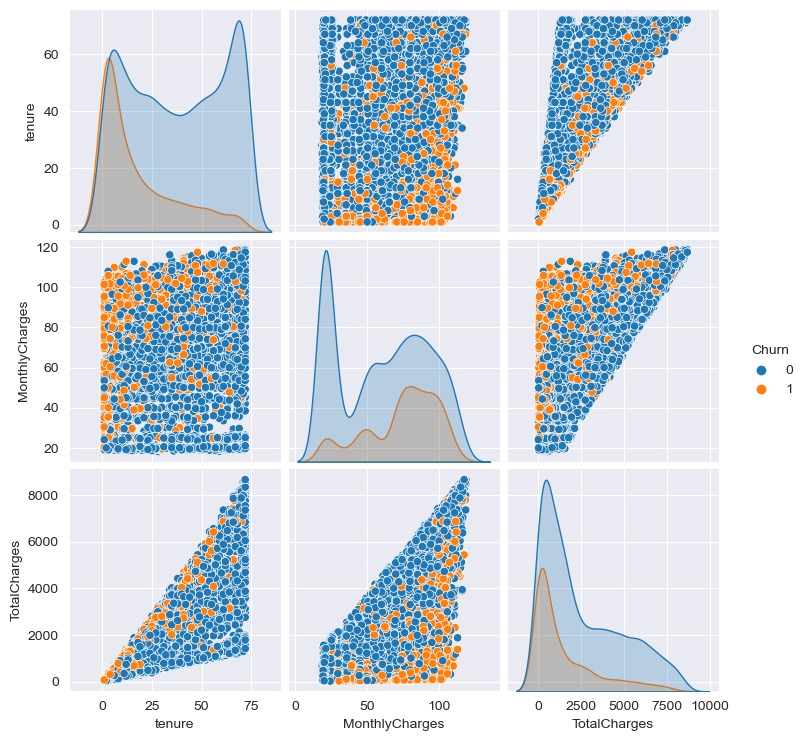

In [24]:
sns.pairplot(data=data, vars=numeric_cols, hue='Churn')


C:\Users\aloui\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Text(0.5, 1.0, 'Correlation Matrix')

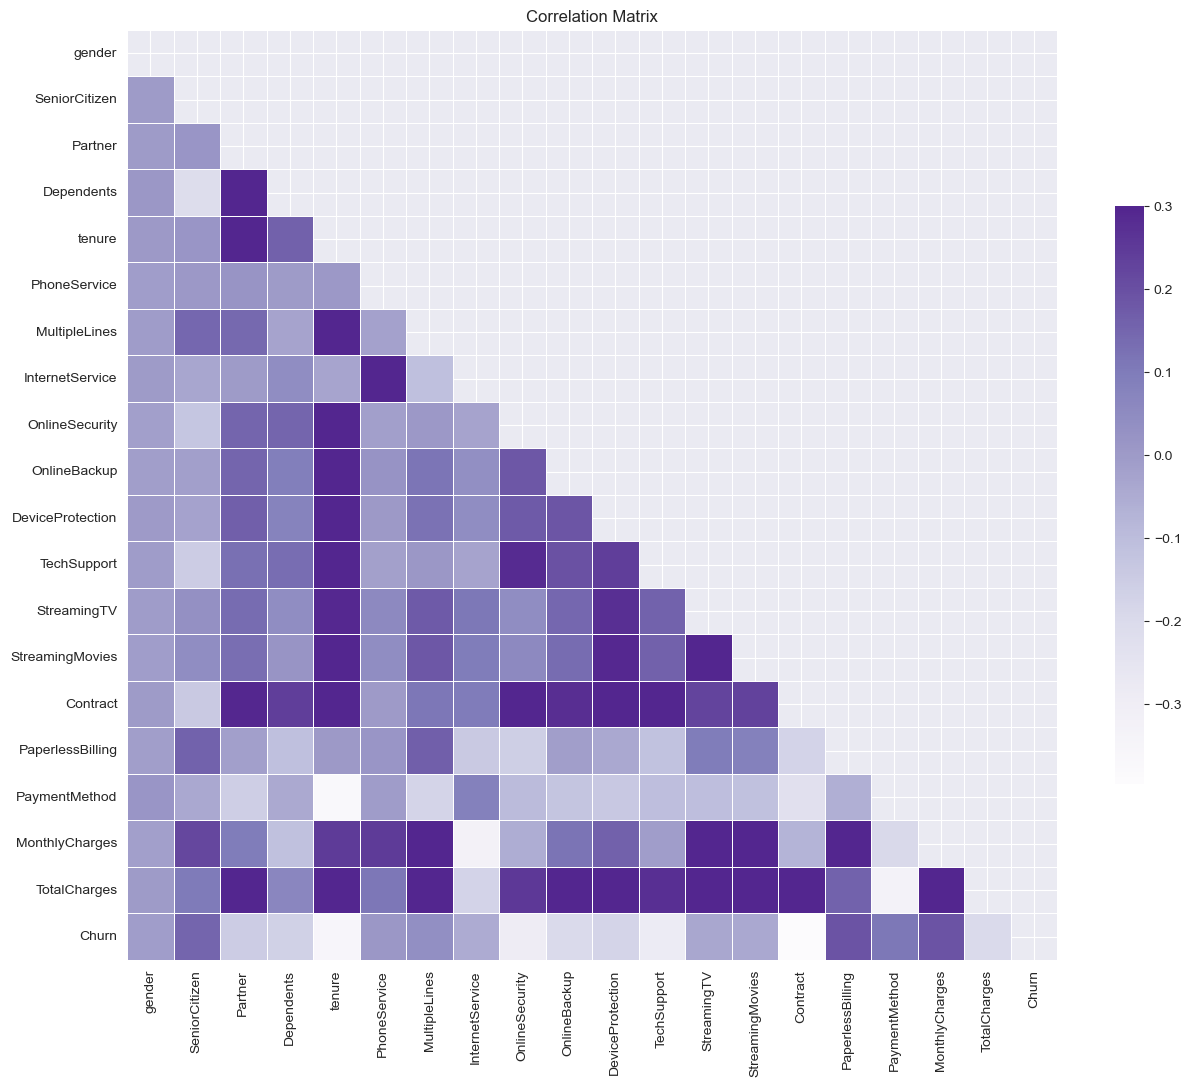

In [25]:
corr = data.corr()

mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='Purples', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
plt.title('Correlation Matrix')

#### Sélection des feautres avec différentes méthodes: SelectKBest, correlation, Recursive Feature Elimination (RFE), VarianceThreshold...

In [26]:
# find best scored 5 features
#SelectKBest
from sklearn.feature_selection import SelectKBest, chi2
X = data.drop('Churn', axis=1)
y = data['Churn']
selector = SelectKBest(score_func=chi2, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print(selected_features)

Index(['tenure', 'OnlineSecurity', 'Contract', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')


In [27]:
#correlation
corr_matrix = data.corr()


In [28]:
correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.2:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)
            
correlated_features = list(correlated_features)


In [29]:
correlated_features

['TotalCharges',
 'PaymentMethod',
 'OnlineBackup',
 'tenure',
 'TechSupport',
 'MonthlyCharges',
 'Dependents',
 'Contract',
 'InternetService',
 'Churn',
 'StreamingMovies',
 'OnlineSecurity',
 'MultipleLines',
 'StreamingTV',
 'DeviceProtection']

In [30]:
#Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
rfe_selector = RFECV(model, step=1, cv=5)
rfe_selector.fit(X, y)
rfe_features = list(X.columns[rfe_selector.support_])


In [31]:
rfe_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [32]:
#VarianceThreshold
from sklearn.feature_selection import VarianceThreshold
vt_selector = VarianceThreshold(threshold=0.05)
vt_selector.fit(X)
vt_features = list(X.columns[vt_selector.get_support()])


In [33]:
vt_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

#### Analyse en composante principale pour faire des représentations graphiques des données.

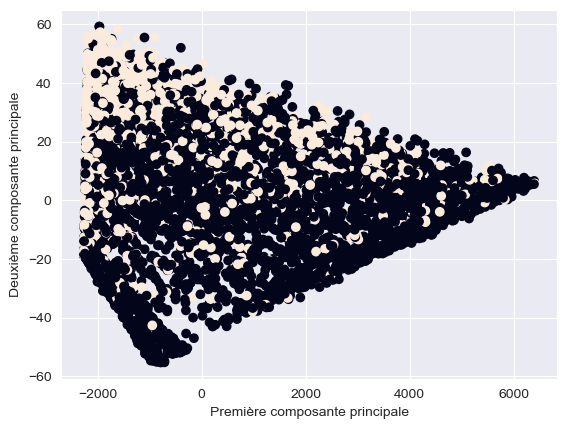

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.show()


#### Division des donnees en target et features

> Bloc en retrait




In [35]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


#  MODELING

# K Nearest Neighbor(KNN)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid = {'n_neighbors': range(1, 26), 'p': range(1, 7)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=3)


In [39]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 26), 'p': range(1, 7)})

#### Affichage des meilleures valeurs des hyperparamètres réglés

In [40]:
print(grid_search.best_params_)

{'n_neighbors': 21, 'p': 1}


In [41]:
from sklearn.neighbors import KNeighborsClassifier
final_model_knn = KNeighborsClassifier(n_neighbors=21, p=1)
final_model_knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=21, p=1)

#### matrice de confusion de __`final_model_knn`__

<Axes: >

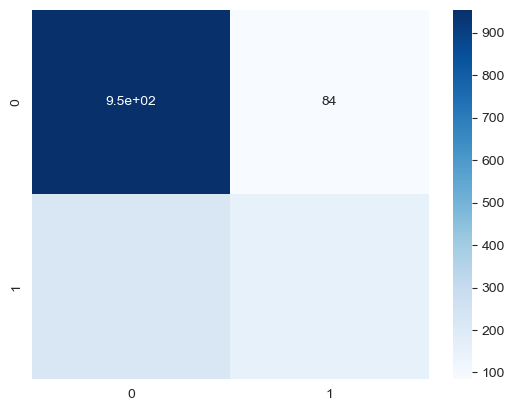

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = final_model_knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')


True Positive (TP) 150/True Negative (TN)950/False Negative (FN) 220/ False Positive (FP) 84

### Affichage du resultat

In [43]:
from sklearn.metrics import classification_report
y_pred = final_model_knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1038
           1       0.64      0.41      0.50       369

    accuracy                           0.79      1407
   macro avg       0.73      0.67      0.68      1407
weighted avg       0.77      0.79      0.77      1407



81% des clients prédits comme non churn sont réellement non churn.
65% des clients prédits comme churn sont réellement churn.
Accurancy est de 0,79, ce qui signifie que le modèle a prédit correctement la classe pour environ 79% des exemples dans l'ensemble de test.

# Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

#### Créeation d' un dictionaire __`param_grid`__, en vue de configurer les trois hyperparamètres suivants :
##### - __`criterion`__ : qui peut être soit l'indice de Gini soit l'entropie
##### - __`max_depth`__ : qui varie de 1 à 19
##### - __`splitter`__ : qui peut être soit best ou random

In [45]:
gridc={'criterion':['gini','entropy'],'max_depth':np.arange(1,20),'splitter':['best','random']}

#### Créeation d'une instance de recherche par grille appliquée sur l'algorithme de classification par arbre de décision. La recherche doit tester toutes les combinaisons des valeurs des hyperparamètres de la grille de la question précédente. La recherche doit se faire à travers une validation croisée à 5 découpes.

In [46]:
grid=GridSearchCV(DecisionTreeClassifier(random_state=0),gridc,cv=5)

#### Affichage des meilleures valeurs des hyperparamètres réglés

In [47]:
grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'splitter': 'random'}

#### Créeation d' une instance __`final_model_dt`__ de l'algorithme de classification par arbres de décision en utilisant les meilleurs hyperparamètres trouvés dans la question précédente

In [48]:
final_model_dt=grid.best_estimator_
final_model_dt


DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0,
                       splitter='random')

In [49]:
final_model_dt.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0,
                       splitter='random')

#### Affichage de l'arbre de décision

In [50]:
features =['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

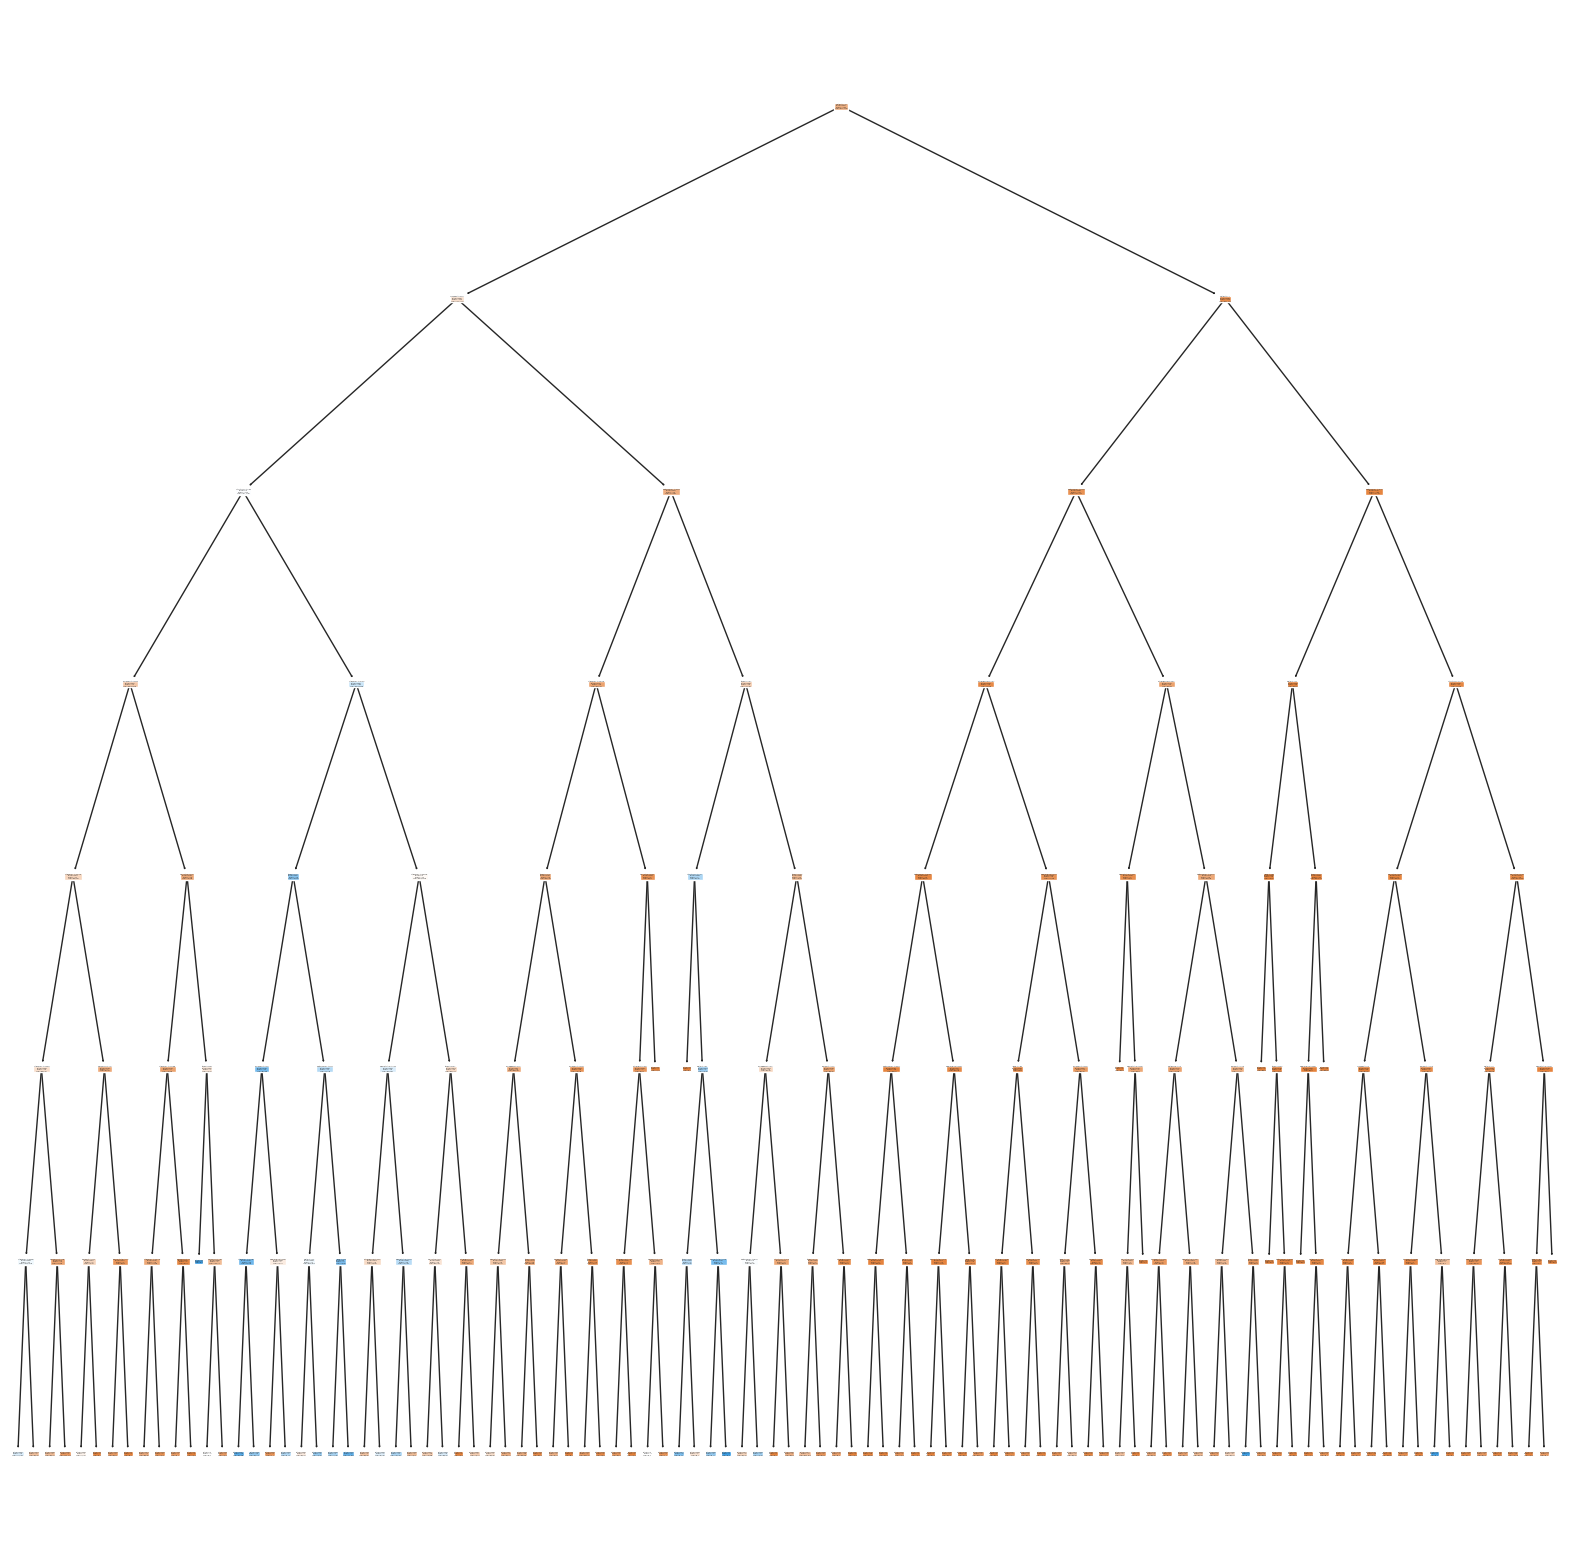

In [51]:
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 20))
plot_tree(final_model_dt, feature_names=features, filled=True)
plt.show()

#### Affichage de l'arbre sous forme de régles de décision

In [52]:
from sklearn.tree import export_text
print(export_text(final_model_dt,feature_names=features,show_weights=True ))

|--- Contract <= 0.22
|   |--- TechSupport <= 0.37
|   |   |--- InternetService <= 0.20
|   |   |   |--- OnlineSecurity <= 0.53
|   |   |   |   |--- TotalCharges <= 1551.48
|   |   |   |   |   |--- TotalCharges <= 475.85
|   |   |   |   |   |   |--- TotalCharges <= 295.93
|   |   |   |   |   |   |   |--- weights: [117.00, 145.00] class: 1
|   |   |   |   |   |   |--- TotalCharges >  295.93
|   |   |   |   |   |   |   |--- weights: [32.00, 16.00] class: 0
|   |   |   |   |   |--- TotalCharges >  475.85
|   |   |   |   |   |   |--- PhoneService <= 0.44
|   |   |   |   |   |   |   |--- weights: [36.00, 17.00] class: 0
|   |   |   |   |   |   |--- PhoneService >  0.44
|   |   |   |   |   |   |   |--- weights: [74.00, 13.00] class: 0
|   |   |   |   |--- TotalCharges >  1551.48
|   |   |   |   |   |--- PhoneService <= 0.21
|   |   |   |   |   |   |--- Dependents <= 0.21
|   |   |   |   |   |   |   |--- weights: [11.00, 10.00] class: 0
|   |   |   |   |   |   |--- Dependents >  0.21
|   |   

#### Matrice de confusion de __`final_model_dt`__

[[916 122]
 [166 203]]


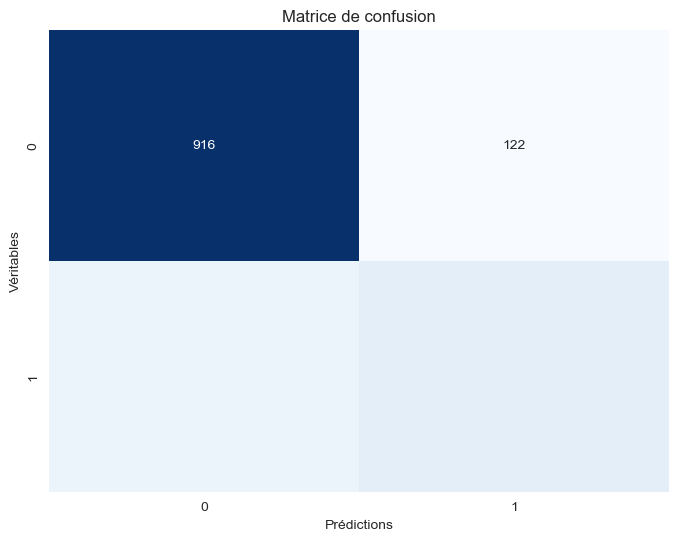

In [53]:
from sklearn.metrics import confusion_matrix



y_pred = final_model_dt.predict(X_test)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
print(cm)

# Optionnel : afficher la matrice de confusion sous forme de graphique avec seaborn
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Prédictions")
plt.ylabel("Véritables")
plt.title("Matrice de confusion")
plt.show()

### Afficher le resultat

In [54]:
from sklearn.metrics import classification_report
y_pred=final_model_dt.predict(X_test)
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1038
           1       0.62      0.55      0.59       369

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.72      1407
weighted avg       0.79      0.80      0.79      1407



# LogisticRegression

In [55]:
# Chargement de LogisticRegression
from sklearn.linear_model import LogisticRegression
LogisticRegression?

In [56]:
log=LogisticRegression(random_state=0)
param_grids ={'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
             'C' : np.linspace(-4, 4, 20),
             'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
             'max_iter' : [100, 1000,2500, 5000]
             }

In [57]:
gridlo=GridSearchCV(log,param_grids,cv=5)

In [58]:
gridlo.fit(X_train,y_train)

C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs fa

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
             param_grid={'C': array([-4.        , -3.57894737, -3.15789474, -2.73684211, -2.31578947,
       -1.89473684, -1.47368421, -1.05263158, -0.63157895, -0.21052632,
        0.21052632,  0.63157895,  1.05263158,  1.47368421,  1.89473684,
        2.31578947,  2.73684211,  3.15789474,  3.57894737,  4.        ]),
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']})

In [59]:
gridlo.best_params_

{'C': 2.3157894736842106,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [60]:
modele_final_log=gridlo.best_estimator_
modele_final_log

LogisticRegression(C=2.3157894736842106, random_state=0, solver='liblinear')

In [61]:
modele_final_log.fit(X_train,y_train)

LogisticRegression(C=2.3157894736842106, random_state=0, solver='liblinear')

#### Tracage de la matrice de confusion

[[930 108]
 [163 206]]


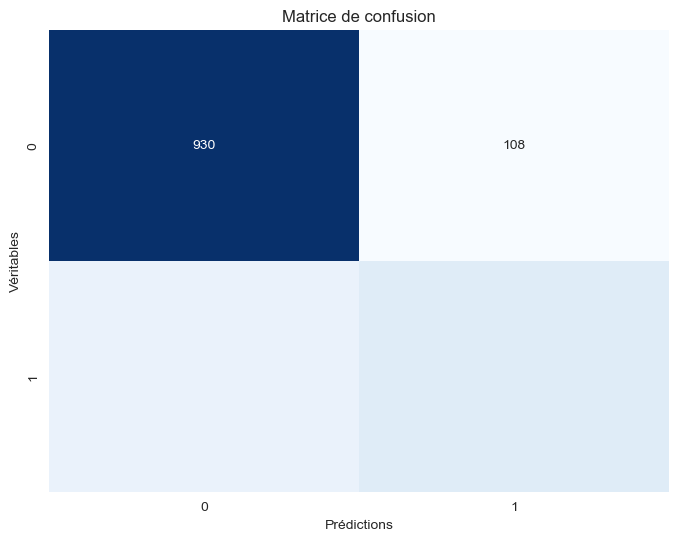

In [62]:
from sklearn.metrics import confusion_matrix
y_pred = modele_final_log.predict(X_test)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
print(cm)

# Optionnel : afficher la matrice de confusion sous forme de graphique avec seaborn
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Prédictions")
plt.ylabel("Véritables")
plt.title("Matrice de confusion")
plt.show()

### Affichage du resultat

In [63]:
from sklearn.metrics import classification_report
y_pred=modele_final_log.predict(X_test)
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1038
           1       0.66      0.56      0.60       369

    accuracy                           0.81      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407



# GaussianNB (Gaussian Naive Bayes)

In [64]:
# Chargement de GaussianNB
from sklearn.naive_bayes import GaussianNB

#### Créeation d' une instance __`model`__ de l'algorithme de classification par GaussianNB.

In [65]:
# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [66]:
y_pred = gnb.predict(X_test)

y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [67]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7498


In [68]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [69]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7536


In [70]:
# check class distribution in test set

y_test.value_counts()

Churn
0    1038
1     369
Name: count, dtype: int64

#### Matrice de confusion

<Axes: >

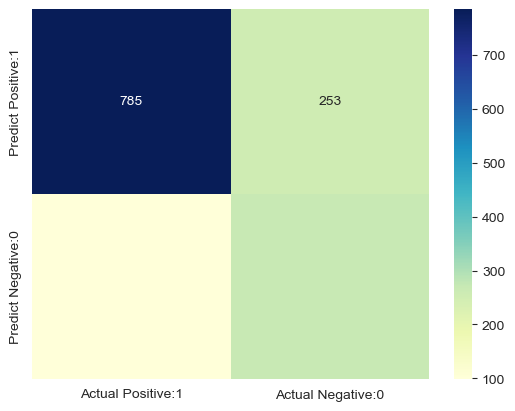

In [71]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Afficher du resultat

In [72]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1038
           1       0.52      0.73      0.61       369

    accuracy                           0.75      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.75      0.76      1407



# SVM

In [73]:
from sklearn.svm import SVC

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {
    'C': [0.1, 1,10],
    'gamma': [0.1,1],
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Meilleurs paramètres:", grid_search.best_params_)


Meilleurs paramètres: {'C': 1, 'gamma': 0.1}


<Axes: >

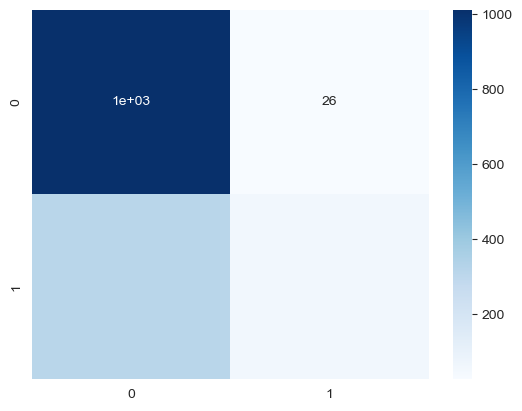

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
final_model_svm = SVC(C=grid_search.best_params_['C'],gamma=grid_search.best_params_['gamma'],probability=True)
final_model_svm.fit(X_train, y_train)
y_pred_svm = final_model_svm.predict(X_test)
y_pred = final_model_svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')


In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.97      0.86      1038
           1       0.69      0.15      0.25       369

    accuracy                           0.76      1407
   macro avg       0.73      0.56      0.55      1407
weighted avg       0.74      0.76      0.70      1407



# Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
randf=RandomForestClassifier()
RandomForestClassifier?

In [79]:
param_grid_ra = { 
    'n_estimators': [200,300,500],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [80]:
grid_search_ra = GridSearchCV(randf,param_grid_ra,cv= 5)

In [81]:
grid_search_ra.fit(X_train,y_train)

C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\aloui\anaconda3\Lib\site-packag

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [200, 300, 500]})

In [82]:
grid_search_ra.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 300}

In [83]:
model_final_ranf=grid_search_ra.best_estimator_
model_final_ranf

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=300)

In [84]:
model_final_ranf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=300)

[[951  87]
 [193 176]]


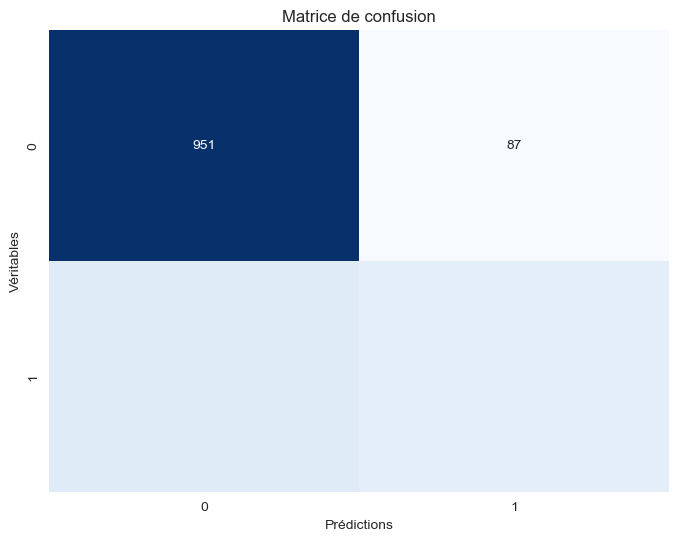

In [85]:
# matrices de confusion

y_pred = model_final_ranf.predict(X_test)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
print(cm)

# Optionnel : afficher la matrice de confusion sous forme de graphique avec seaborn
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Prédictions")
plt.ylabel("Véritables")
plt.title("Matrice de confusion")
plt.show()

In [86]:
from sklearn.metrics import classification_report
y_pred=model_final_ranf.predict(X_test)
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1038
           1       0.67      0.48      0.56       369

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407



# XGBoost

In [90]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 929.6 kB/s eta 0:02:14
   ---------------------------------------- 0.8/124.9 MB 1.0 MB/s eta 0:02:03
   ---------------------------------------- 1.0/124.9 MB 1.1 MB/s eta 0:01:54
   ---------------------------------------- 1.3/124.9 MB 1.1 MB/s eta 0:01:51
   ---------------------------------------- 1.3/124.9 MB 1.1 MB/s eta 0:01:51
    --------------------------------------- 1.6/124.9 MB 1.1 MB/s eta 0:01:52
    --------------------------------------- 1.8/124.9 MB 1.1 MB/s eta 0:01:52
    --------------------------------------- 2.1/124.9 MB 1.1 MB/s eta 0:01:49
    --------------------------------------- 2.4/124.9 MB 1.1 MB/s eta 0:01:47
    --------------------------------------- 2.6/124.9 MB 1.2 MB/s eta 0:01:46
    -

In [92]:

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [93]:


xgb = XGBClassifier()
param_grid = {'max_depth': [3, 4],
              'learning_rate': [0.01, 0.1],
              'n_estimators': [50, 100],
              'min_child_weight': [1, 2, 3],
              'subsample': [0.6, 0.7],
              'colsample_bytree': [0.6, 0.7],
              'gamma': [0, 1, 2]}
grid_search = GridSearchCV(xgb, param_grid, cv=3,)
grid_search.fit(X_train, y_train)
print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'colsample_bytree': 0.6, 'gamma': 2, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 50, 'subsample': 0.7}


In [94]:

final_model_xgb = XGBClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                                    max_depth=grid_search.best_params_['max_depth'],
                                    learning_rate=grid_search.best_params_['learning_rate'])
final_model_xgb.fit(X_train, y_train)
y_pred = final_model_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8045486851457001


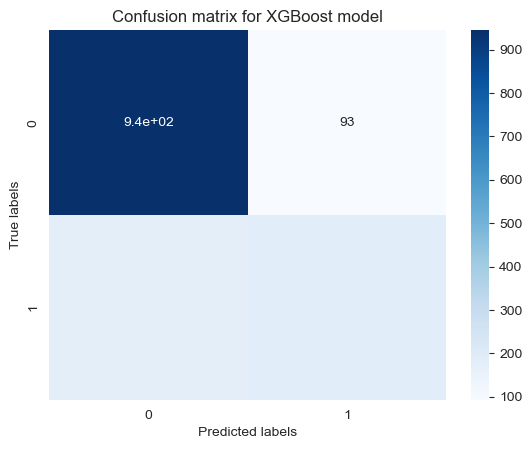

In [95]:
y_pred = final_model_xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion matrix for XGBoost model')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [96]:
from sklearn.metrics import classification_report
y_pred = final_model_xgb.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1038
           1       0.67      0.51      0.58       369

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.80      1407



# Neural Network

In [97]:
from sklearn.neural_network import MLPClassifier

In [98]:
clf = MLPClassifier(random_state=0, max_iter=300).fit(X_train, y_train)

In [99]:
clf.fit(X,y)
predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [100]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,predict_train))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      4125
           1       0.71      0.38      0.49      1500

    accuracy                           0.79      5625
   macro avg       0.76      0.66      0.68      5625
weighted avg       0.78      0.79      0.77      5625



<Axes: >

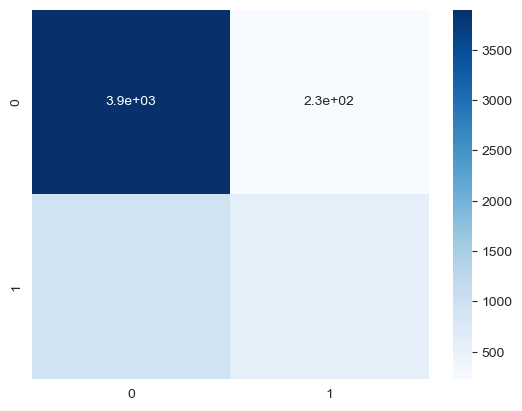

In [101]:
cm_matrix = pd.DataFrame(data=confusion_matrix(y_train,predict_train))

sns.heatmap(cm_matrix, annot=True,cmap='Blues')

# Etude compartive

| Algorithm          | weighted_avg_recall | weighted_avg_precsion | weighted_avg_F1-score|
|--------------------|---------------------|-----------------------|----------------------|
| KNN                | 0.77                   | 0.79                     | 0.77                   |
| Decision Tree      | 0.78                    | 0.79                      | 0.78                    |
| LogisticRegression | 0.80                    | 0.81                      | 0.80                   |
| SVM                | 0.74                            | 0.76                     |   0.70                 |
| Random Forest      | 0.79                   | 0.80                     | 0.79                    |
| XGBOOST            | 0.79                  |0.80                    | 0.79                    |
| Neural Network     | 0.79                  | 0.80                     | 0.78
| Naïve Bayes   | 0.79   | 0.75                   | 0.76                     | 

Les resultats montrent que le Logistic Regression a la meilleure précision pondérée moyenne (0.81) et le meilleur F1-score pondéré moyen (0.80), tandis que le SVM a la plus faible précision pondérée moyenne (0.76) et le plus faible F1-score pondéré moyen (0.70).

# Courbe Roc et Auc
KNN

AUC Score KNN: 0.8043519693385759


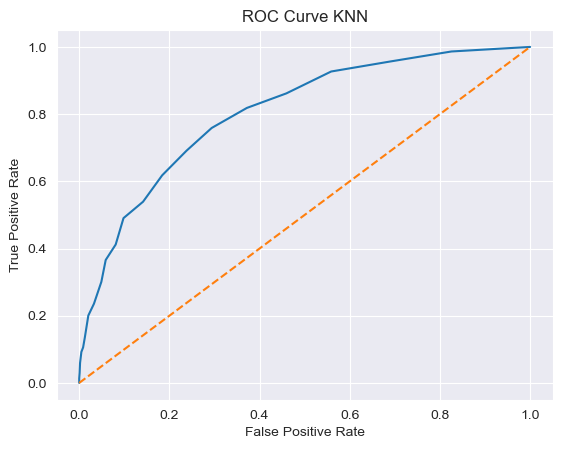

In [102]:
from sklearn.metrics import roc_curve, roc_auc_score
# Predict probabilities of class 1 (positive class) for the test set
y_proba = final_model_knn.predict_proba(X_test)[:, 1]

# Compute false positive rate, true positive rate, and thresholds for different probability thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve KNN')

# Compute AUC score
auc_score = roc_auc_score(y_test, y_proba)
print('AUC Score KNN:', auc_score)


XG BOOST

AUC Score XGBOOST: 0.8422688513975698


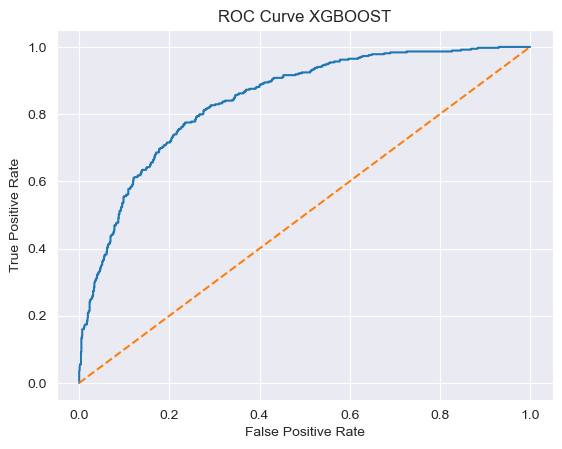

In [103]:
y_proba = final_model_xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve XGBOOST')
# Compute AUC score
auc_score = roc_auc_score(y_test, y_proba)
print('AUC Score XGBOOST:', auc_score)


LOG REGRESSION

AUC Score regression logistic: 0.840067933434633


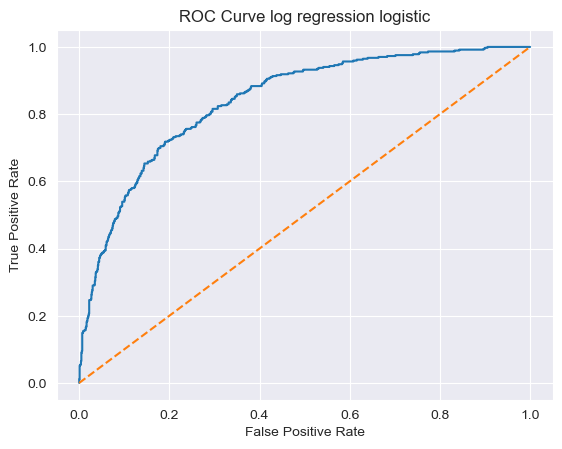

In [104]:
y_proba = modele_final_log.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve log regression logistic')

# Compute AUC score
auc_score = roc_auc_score(y_test, y_proba)
print('AUC Score regression logistic:', auc_score)


Random Forest

AUC Score random forest: 0.8463521677605987


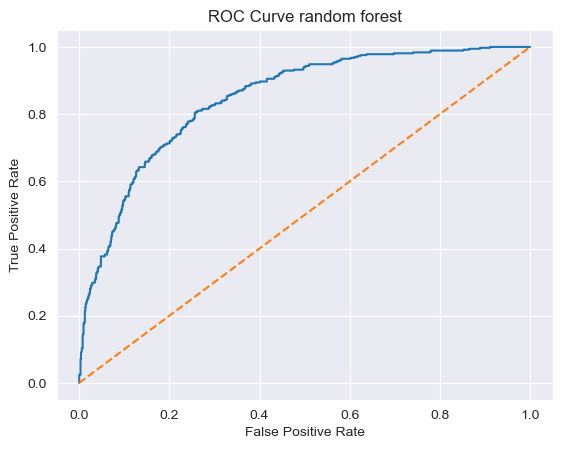

In [105]:
y_proba = model_final_ranf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve random forest')

# Compute AUC score
auc_score = roc_auc_score(y_test, y_proba)
print('AUC Score random forest:', auc_score)


Arbre de decision

AUC Score arbre de decision: 0.8201891797338012


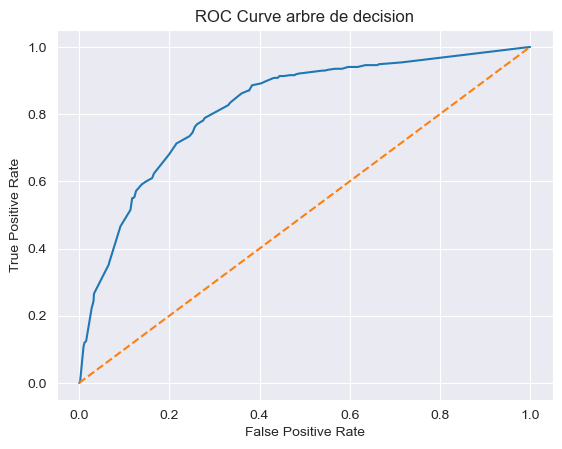

In [106]:
y_proba = final_model_dt.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve arbre de decision')

# Compute AUC score
auc_score = roc_auc_score(y_test, y_proba)
print('AUC Score arbre de decision:', auc_score)


svm

AUC Score SVM: 0.6985577851924955


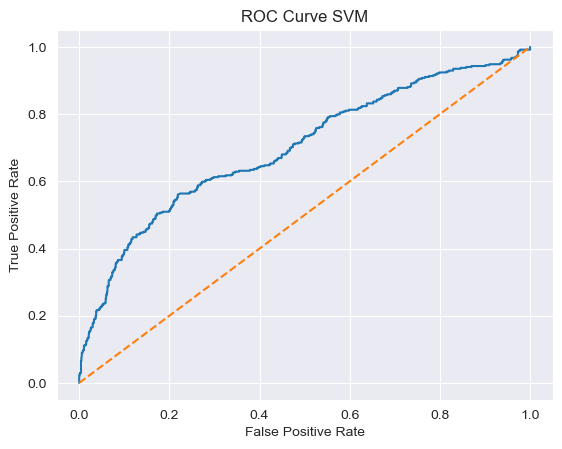

In [107]:
y_proba = final_model_svm.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve SVM')

# Compute AUC score
auc_score = roc_auc_score(y_test, y_proba)
print('AUC Score SVM:', auc_score)


Naive Bayes

AUC Score Naive Bayes : 0.8165288155771733


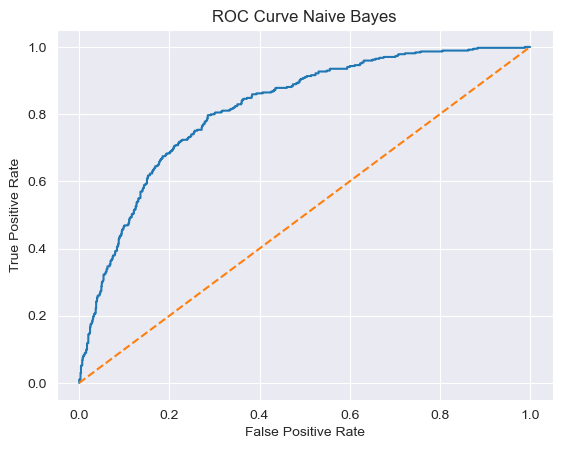

In [108]:
y_proba = gnb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Naive Bayes')

# Compute AUC score
auc_score = roc_auc_score(y_test, y_proba)
print('AUC Score Naive Bayes :', auc_score)

Neural Network

AUC Score Neural Network : 0.785452271671079


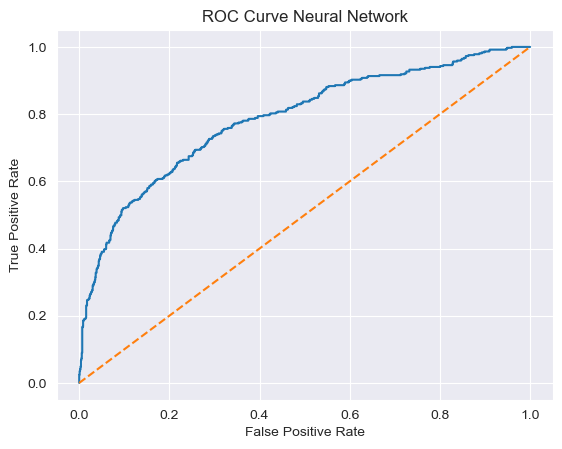

In [109]:
y_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Neural Network')

# Compute AUC score
auc_score = roc_auc_score(y_test, y_proba)
print('AUC Score Neural Network :', auc_score)

Selon ces courbes, le modele le plus performant est le modele de Random Forest avec AUC score 0.846 tandis que SVM a le le faible score 0.69.